In [1]:
import numpy as np
import random
random.seed(1)
import matplotlib.pyplot as plt

In [2]:
def create_board():
    return np.zeros((3,3))

In [3]:
def place(board , player , position):
    if board[position] == 0:
        board[position] = player

In [4]:
def possibility(board):
    free = np.where(board == 0)
    return list(zip(free[0] , free[1]))

In [5]:
def random_choice(board ,player):
    select = possibility(board)
    if len(select) > 0:
        final_s = random.choice(select)
        place(board , player , final_s)
    return board

In [6]:
def check_row(row, player):
    for marker in row:
        if marker != player:
            return False
    return True

def row_win(board, player):
    for row in board:
        if check_row(row, player):
            return True
    return False  

def col_win(board, player):
    for row in board.T:
        if check_row(row, player):
            return True
    return False

In [7]:
board = create_board()

In [8]:
for i in range(3):
    for i in [1,2]:
        random_choice(board,i)

In [9]:
board

array([[2., 2., 1.],
       [0., 1., 0.],
       [0., 1., 2.]])

In [10]:
row_win(board,1)

False

In [11]:
row_win(board , 2)

False

In [12]:
col_win(board , 1)

False

In [13]:
col_win(board , 2)

False

In [14]:
def diag_win(board, player):
    main_diag = board.diagonal()
    anti_diag = np.flipud(board).diagonal()
    return check_row(main_diag, player) or check_row(anti_diag, player)

In [15]:
board

array([[2., 2., 1.],
       [0., 1., 0.],
       [0., 1., 2.]])

In [16]:
board[1][1]= 1

In [17]:
board

array([[2., 2., 1.],
       [0., 1., 0.],
       [0., 1., 2.]])

In [18]:
diag_win(board,2)

False

In [19]:
#for i in range(3):
#    for j in range(3):
#        board[i][j] = input ("print value")

In [20]:
board

array([[2., 2., 1.],
       [0., 1., 0.],
       [0., 1., 2.]])

In [21]:
board[1][1] = 2

In [22]:
board

array([[2., 2., 1.],
       [0., 2., 0.],
       [0., 1., 2.]])

In [23]:
diag_win(board ,2)

True

In [84]:
def evaluate(board):
    winner = 0
    for player in [1, 2]:
        if row_win(board , player) or col_win(board,player) or diag_win(board,player):
            return player
    if np.all(board != 0) and winner == 0:
        winner = -1
    return winner

In [85]:
evaluate(board)

2

In [86]:
random.seed(1)

In [87]:
def play_game():
    board = create_board()
    while True:
        for player in [1,2]:
            random_choice(board, player)
            result = evaluate(board)
            if result != 0:
                return result

In [88]:
random.seed(1)
results = list()
for turn in range(1000):
    result = play_game()
    results.append(result)

In [89]:
len(results)

1000

591


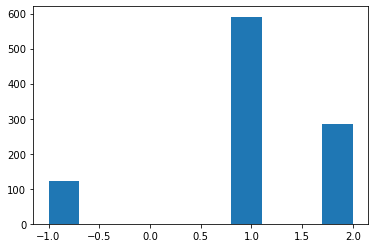

In [95]:
print(results.count(1))
plt.hist(results);
plt.savefig("Normal tic tac.jpg")

In [91]:
#random.seed(1)
def play_strategic_game():
    board = create_board()
    winner = 0
    board[1,1] = 1
    while winner == 0:
        for player in [2,1]:
            board = random_choice(board, player)
            winner = evaluate(board)
            if winner != 0:
                break
    return winner 

In [92]:
play_strategic_game()

1

In [93]:
random.seed(1)
result1 = list()
for turn in range(1000):
    result = play_strategic_game()
    result1.append(result)

716


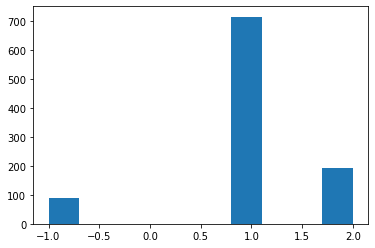

In [96]:
print(result1.count(1))
plt.hist(result1);
plt.savefig("Strategic.jpg")